In the following code will be used to explore and visualize in vivo 2-photon microscopy data taken from WT and Scn1a+/- (Dravet Syndrome) mice.

2 WT mice (M3009_FOV1, M3068_FOV1)
2 Scn1a+/- mice (M3007_FOV1, M3011_FOV1)

Within each folder of data there are 8 files:
1. F.npy: array of fluorescence traces (ROIs by timepoints)
2. F_chan2.npy: array of fluorescence traces for channel 2 (ROIs by timepoints)
3. Fall.mat
4. Fneu.py: array of neuropil fluorescence traces (ROIs by timepoints)
5. Fneu_chan2.py: array of neuropil fluorescence traces for channel 2 (ROIs by timepoints)
6. spks.npy: array of deconvoluted traces (ROIs by 1)
7. ops.npy: options and intermediate outputs (dict)
8. iscell.npy: specifies whether an ROI is a cell (first column in 0/1, second column in probability that ROI is a cell based on default classifier)

In [491]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

### Importing Data ###

# Set path to directory containing all data
path = '/Users/sophieliebergall/Box Sync/MD-PhD/Goldberg Lab/2P_analysis/seizure_data'

## WT mouse 3009:
path2 = path + '/WT/M3009_FOV1/'
WT_3009_F = np.load(path2+'F.npy', allow_pickle=True)
WT_3009_Fneu = np.load(path2+'Fneu.npy', allow_pickle=True)
WT_3009_spks = np.load(path2+'spks.npy', allow_pickle=True)
WT_3009_stat = np.load(path2+'stat.npy', allow_pickle=True)
WT_3009_ops =  np.load(path2+'ops.npy', allow_pickle=True)
WT_3009_ops = WT_3009_ops.item()
WT_3009_iscell = np.load(path2+'iscell.npy', allow_pickle=True)
WT_3009_redcell = np.load(path2+'redcell.npy', allow_pickle=True)

## WT mouse 3068:
path2 = path + '/WT/M3068_FOV1/'
WT_3068_F = np.load(path2+'F.npy', allow_pickle=True)
WT_3068_Fneu = np.load(path2+'Fneu.npy', allow_pickle=True)
WT_3068_spks = np.load(path2+'spks.npy', allow_pickle=True)
WT_3068_stat = np.load(path2+'stat.npy', allow_pickle=True)
WT_3068_ops =  np.load(path2+'ops.npy', allow_pickle=True)
WT_3068_ops = WT_3068_ops.item()
WT_3068_iscell = np.load(path2+'iscell.npy', allow_pickle=True)
WT_3068_redcell = np.load(path2+'redcell.npy', allow_pickle=True)

## Scn1a mouse 3007:
path2 = path + '/scn1a/M3007_FOV1/'
scn1a_3007_F = np.load(path2+'F.npy', allow_pickle=True)
scn1a_3007_Fneu = np.load(path2+'Fneu.npy', allow_pickle=True)
scn1a_3007_spks = np.load(path2+'spks.npy', allow_pickle=True)
scn1a_3007_stat = np.load(path2+'stat.npy', allow_pickle=True)
scn1a_3007_ops =  np.load(path2+'ops.npy', allow_pickle=True)
scn1a_3007_ops = scn1a_3007_ops.item()
scn1a_3007_iscell = np.load(path2+'iscell.npy', allow_pickle=True)
scn1a_3007_redcell = np.load(path2+'redcell.npy', allow_pickle=True)

## Scn1a mouse 3011:
path2 = path + '/scn1a/M3011_FOV1/'
scn1a_3011_F = np.load(path2+'F.npy', allow_pickle=True)
scn1a_3011_Fneu = np.load(path2+'Fneu.npy', allow_pickle=True)
scn1a_3011_spks = np.load(path2+'spks.npy', allow_pickle=True)
scn1a_3011_stat = np.load(path2+'stat.npy', allow_pickle=True)
scn1a_3011_ops =  np.load(path2+'ops.npy', allow_pickle=True)
scn1a_3011_ops = scn1a_3011_ops.item()
scn1a_3011_iscell = np.load(path2+'iscell.npy', allow_pickle=True)
scn1a_3011_redcell = np.load(path2+'redcell.npy', allow_pickle=True)

array([[2058.4026 , 1820.6339 , 1628.5273 , ..., 2295.849  , 2051.957  ,
        2287.5278 ],
       [1450.3695 , 1087.6287 , 1017.52264, ..., 2254.5518 , 2206.133  ,
        2067.5127 ],
       [1219.0049 , 1030.4897 , 1032.645  , ..., 1201.0038 , 1218.859  ,
        1261.0532 ],
       ...,
       [1314.4341 ,  864.0299 ,  737.91364, ..., 1365.2    , 1848.7253 ,
        1462.2833 ],
       [ 513.43744,  391.0421 ,  538.1213 , ..., 1222.0812 , 1298.4027 ,
        1132.0934 ],
       [ 957.66125,  851.1126 ,  628.0864 , ..., 1656.2058 , 1747.4363 ,
        1593.9187 ]], dtype=float32)

stat.npy fields:

- ypix: y-pixels of cell
- xpix: x-pixels of cell
- med: (y,x) center of cell
- lam: pixel mask (sum(lam * frames[ypix,xpix,:]) = fluorescence)
- npix: number of pixels in ROI
- npix_norm: number of pixels in ROI normalized by the mean of npix across all ROIs
- radius: estimated radius of cell from 2D Gaussian fit to mask
- aspect_ratio: ratio between major and minor axes of a 2D Gaussian fit to mask
- compact: how compact the ROI is (1 is a disk, >1 means less compact)
- footprint: spatial extent of an ROI’s functional signal, including pixels not assigned to the ROI; a threshold of 1/5 of the max is used as a threshold, and the average distance of these pixels from the center is defined as the footprint
- skew: skewness of neuropil-corrected fluorescence trace
- std: standard deviation of neuropil-corrected fluorescence trace
- overlap: which pixels overlap with other ROIs (these are excluded from fluorescence computation)
- ipix_neuropil: pixels of neuropil mask for this cell

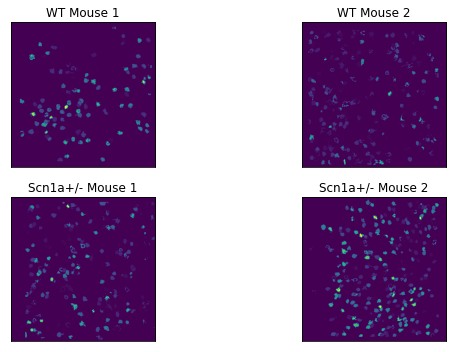

In [217]:
### Create a figure of identified cellsa in the field

fig, axs = plt.subplots(2,2)

## WT 3009 cells
WT_3009_cellids = np.where(WT_3009_iscell[:,0] == 1)

WT_3009_im = np.zeros((WT_3009_ops['Ly'], WT_3009_ops['Lx']))

for n in WT_3009_cellids[0]:
    ypix = WT_3009_stat[n]['ypix'][~WT_3009_stat[n]['overlap']]
    xpix = WT_3009_stat[n]['xpix'][~WT_3009_stat[n]['overlap']]
    WT_3009_im[ypix,xpix] = n+1
    
## WT 3068 cells
WT_3068_cellids = np.where(WT_3068_iscell[:,0] == 1)

WT_3068_im = np.zeros((WT_3068_ops['Ly'], WT_3068_ops['Lx']))

for n in WT_3068_cellids[0]:
    ypix = WT_3068_stat[n]['ypix'][~WT_3068_stat[n]['overlap']]
    xpix = WT_3068_stat[n]['xpix'][~WT_3068_stat[n]['overlap']]
    WT_3068_im[ypix,xpix] = n+1

## Scn1a 3007 cells
scn1a_3007_cellids = np.where(scn1a_3007_iscell[:,0] == 1)

scn1a_3007_im = np.zeros((scn1a_3007_ops['Ly'], scn1a_3007_ops['Lx']))

for n in scn1a_3007_cellids[0]:
    ypix = scn1a_3007_stat[n]['ypix'][~scn1a_3007_stat[n]['overlap']]
    xpix = scn1a_3007_stat[n]['xpix'][~scn1a_3007_stat[n]['overlap']]
    scn1a_3007_im[ypix,xpix] = n+1
    
## Scn1a 3011 cells
scn1a_3011_cellids = np.where(scn1a_3011_iscell[:,0] == 1)

scn1a_3011_im = np.zeros((scn1a_3011_ops['Ly'], scn1a_3011_ops['Lx']))

for n in scn1a_3011_cellids[0]:
    ypix = scn1a_3011_stat[n]['ypix'][~scn1a_3011_stat[n]['overlap']]
    xpix = scn1a_3011_stat[n]['xpix'][~scn1a_3011_stat[n]['overlap']]
    scn1a_3011_im[ypix,xpix] = n+1

axs[0,0].imshow(WT_3009_im)
axs[0,1].imshow(WT_3068_im)
axs[1,0].imshow(scn1a_3007_im)
axs[1,1].imshow(scn1a_3011_im)

# Set title for each subplot
axs[0,0].title.set_text('WT Mouse 1')
axs[0,1].title.set_text('WT Mouse 2')
axs[1,0].title.set_text('Scn1a+/- Mouse 1')
axs[1,1].title.set_text('Scn1a+/- Mouse 2')

axs[0,0].xaxis.set_visible(False)
axs[0,0].yaxis.set_visible(False)
axs[0,1].xaxis.set_visible(False)
axs[0,1].yaxis.set_visible(False)
axs[1,0].xaxis.set_visible(False)
axs[1,0].yaxis.set_visible(False)
axs[1,1].xaxis.set_visible(False)
axs[1,1].yaxis.set_visible(False)

plt.tight_layout()
plt.savefig('./registration',dpi=600)
plt.show()

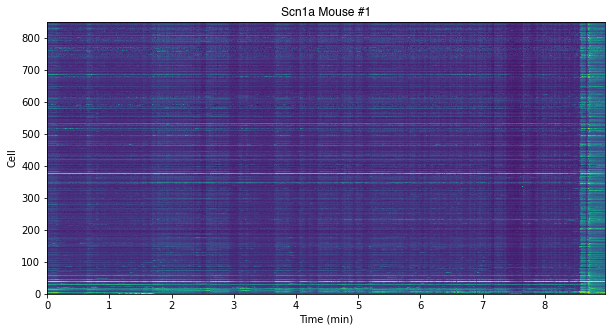

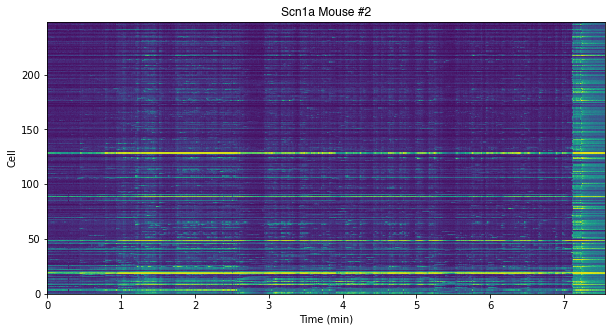

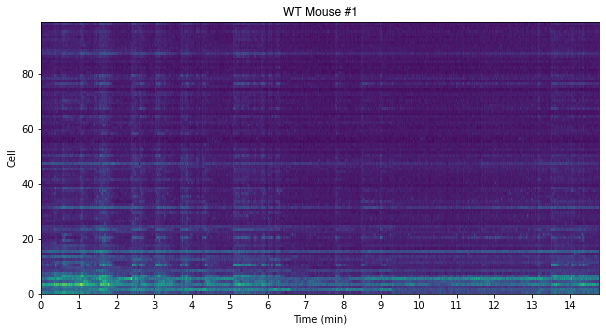

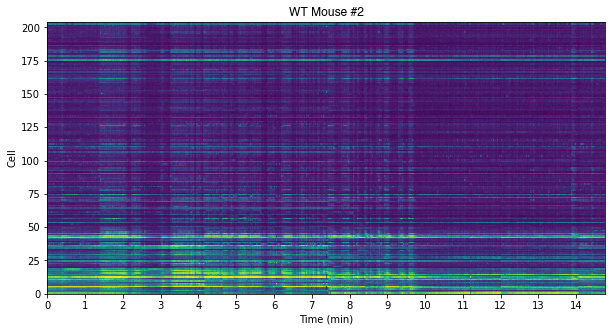

In [220]:
### Plotting raw fluorescence traces as colormesh figures

## Create data sets only showing ROIs identified as cells
scn1a_3007_Fcells = scn1a_3007_F
scn1a_3011_Fcells = scn1a_3011_F[scn1a_3011_cellids[0]]
WT_3009_Fcells = WT_3009_F[WT_3009_cellids[0]]
WT_3068_Fcells = WT_3068_F[WT_3068_cellids[0]]

## Plot raw fluorescence traces as pcolormesh plot

hfont = {'fontname':'Helvetica'}

# Scn1a 3007
xticks = np.arange(0,scn1a_3007_Fcells.shape[1],1800) # Set x-ticks
xticklabels = np.arange(0,scn1a_3007_Fcells.shape[1]/1800,1, dtype='int32') # Set x-tick labels
fig, ax = plt.subplots()
plt.title('Scn1a Mouse #1',**hfont) # Set title
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels)
ax.set_xlabel('Time (min)')
ax.set_ylabel('Cell')
ax.pcolormesh(scn1a_3007_Fcells)

plt.savefig('raw_trace_colormesh1')

# Scn1a 3011
xticks = np.arange(0,scn1a_3011_Fcells.shape[1],1800) # Set x-ticks
xticklabels = np.arange(0,scn1a_3011_Fcells.shape[1]/1800,1, dtype='int32') # Set x-tick labels
fig, ax = plt.subplots()
plt.title('Scn1a Mouse #2',**hfont)
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels)
ax.set_xlabel('Time (min)')
ax.set_ylabel('Cell')
ax.pcolormesh(scn1a_3011_Fcells)

plt.savefig('raw_trace_colormesh2')

# WT 3009
xticks = np.arange(0,WT_3009_Fcells.shape[1],1800) # Set x-ticks
xticklabels = np.arange(0,WT_3009_Fcells.shape[1]/1800,1, dtype='int32') # Set x-tick labels
fig, ax = plt.subplots()
plt.title('WT Mouse #1',**hfont)
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels)
ax.set_xlabel('Time (min)')
ax.set_ylabel('Cell')
ax.pcolormesh(WT_3009_Fcells)

plt.savefig('raw_trace_colormesh3')

# WT 3068
xticks = np.arange(0,WT_3068_Fcells.shape[1],1800) # Set x-ticks
xticklabels = np.arange(0,WT_3068_Fcells.shape[1]/1800,1, dtype='int32') # Set x-tick labels
fig, ax = plt.subplots()
plt.title('WT Mouse #2',**hfont)
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels)
ax.set_xlabel('Time (min)')
ax.set_ylabel('Cell')
ax.pcolormesh(WT_3068_Fcells)

plt.savefig('raw_trace_colormesh4')

In [4]:
### Generating dF/F values

# Scn1a 3007
scn1a_3007_dFall = scn1a_3007_F.copy() - 0.7*scn1a_3007_Fneu # Subtract neuropil scaled to 0.7
scn1a_3007_dFall = np.add(scn1a_3007_dFall, np.absolute(scn1a_3007_dFall.min())) # Make sure there are no negative values for fluorescence
scn1a_3007_F0 = np.tile(np.percentile(scn1a_3007_dFall[:,0:7200], .10, axis=1),(scn1a_3007_dFall.shape[1],1)).transpose() # Define F0 value as 10th percentile of first 4 minutes
scn1a_3007_dFFall = (scn1a_3007_dFall - scn1a_3007_F0) / scn1a_3007_F0 # dF = (F(t)-F0)/F0
scn1a_3007_dFF = scn1a_3007_dFFall[scn1a_3007_cellids[0]] # Select only cells

# Scn1a 3011
scn1a_3011_dFall = scn1a_3011_F.copy() - 0.7*scn1a_3011_Fneu # Subtract neuropil scaled to 0.7
scn1a_3011_dFall = np.add(scn1a_3011_dFall, np.absolute(scn1a_3011_dFall.min())) # Make sure there are no negative values for fluorescence
scn1a_3011_F0 = np.tile(np.percentile(scn1a_3011_dFall[:,0:7200], .10, axis=1),(scn1a_3011_dFall.shape[1],1)).transpose() # Define F0 value as 10th percentile of first 4 minutes
scn1a_3011_dFFall = (scn1a_3011_dFall - scn1a_3011_F0) / scn1a_3011_F0 # dF = (F(t)-F0)/F0
scn1a_3011_dFF = scn1a_3011_dFFall[scn1a_3011_cellids[0]] # Select only cells

# WT 3009
WT_3009_dFall = WT_3009_F.copy() - 0.7*WT_3009_Fneu # Subtract neuropil scaled to 0.7
WT_3009_dFall = np.add(WT_3009_dFall, np.absolute(WT_3009_dFall.min())) # Make sure there are no negative values for fluorescence
WT_3009_F0 = np.tile(np.percentile(WT_3009_dFall[:,0:7200], .10, axis=1),(WT_3009_dFall.shape[1],1)).transpose() # Define F0 value as 10th percentile of first 4 minutes
WT_3009_dFFall = (WT_3009_dFall - WT_3009_F0) / WT_3009_F0 # dF = (F(t)-F0)/F0
WT_3009_dFF = WT_3009_dFFall[WT_3009_cellids[0]] # Select only cells

# WT 3068
WT_3068_dFall = WT_3068_F.copy() - 0.7*WT_3068_Fneu # Subtract neuropil scaled to 0.7
WT_3068_dFall = np.add(WT_3068_dFall, np.absolute(WT_3068_dFall.min())) # Make sure there are no negative values for fluorescence
WT_3068_F0 = np.tile(np.percentile(WT_3068_dFall[:,0:7200], .10, axis=1),(WT_3068_dFall.shape[1],1)).transpose() # Define F0 value as 10th percentile of first 4 minutes
WT_3068_dFFall = (WT_3068_dFall - WT_3068_F0) / WT_3068_F0 # dF = (F(t)-F0)/F0
WT_3068_dFF = WT_3068_dFFall[WT_3068_cellids[0]] # Select only cells


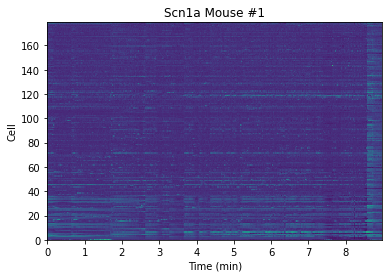

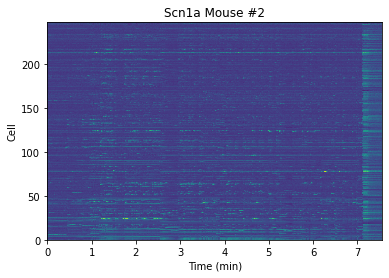

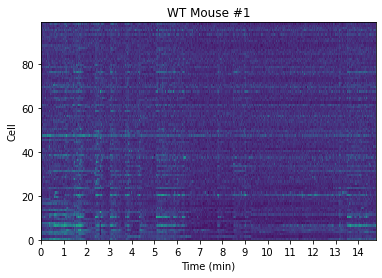

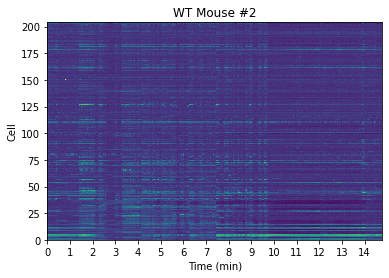

In [5]:
### Plot dF/F values as pcolormesh plot

# Scn1a 3007
xticks = np.arange(0,scn1a_3007_Fcells.shape[1],1800) # Set x-ticks
xticklabels = np.arange(0,scn1a_3007_Fcells.shape[1]/1800,1, dtype='int32') # Set x-tick labels
fig, ax = plt.subplots()
plt.title('Scn1a Mouse #1',**hfont) # Set title
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels)
ax.set_xlabel('Time (min)')
ax.set_ylabel('Cell')
ax.pcolormesh(scn1a_3007_dFF)

# Scn1a 3011
xticks = np.arange(0,scn1a_3011_Fcells.shape[1],1800) # Set x-ticks
xticklabels = np.arange(0,scn1a_3011_Fcells.shape[1]/1800,1, dtype='int32') # Set x-tick labels
fig, ax = plt.subplots()
plt.title('Scn1a Mouse #2',**hfont)
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels)
ax.set_xlabel('Time (min)')
ax.set_ylabel('Cell')
ax.pcolormesh(scn1a_3011_dFF)

# WT 3009
xticks = np.arange(0,WT_3009_Fcells.shape[1],1800) # Set x-ticks
xticklabels = np.arange(0,WT_3009_Fcells.shape[1]/1800,1, dtype='int32') # Set x-tick labels
fig, ax = plt.subplots()
plt.title('WT Mouse #1',**hfont)
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels)
ax.set_xlabel('Time (min)')
ax.set_ylabel('Cell')
ax.pcolormesh(WT_3009_dFF)

# WT 3068
xticks = np.arange(0,WT_3068_Fcells.shape[1],1800) # Set x-ticks
xticklabels = np.arange(0,WT_3068_Fcells.shape[1]/1800,1, dtype='int32') # Set x-tick labels
fig, ax = plt.subplots()
plt.title('WT Mouse #2',**hfont)
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels)
ax.set_xlabel('Time (min)')
ax.set_ylabel('Cell')
ax.pcolormesh(WT_3068_dFF)

In [290]:
### Selecting Red Cells

# Only select red ids that are cells
scn1a_3007_rediscell = scn1a_3007_redcell[scn1a_3007_cellids[0]]
scn1a_3011_rediscell = scn1a_3011_redcell[scn1a_3011_cellids[0]]
WT_3009_rediscell = WT_3009_redcell[WT_3009_cellids[0]]
WT_3068_rediscell = WT_3068_redcell[WT_3068_cellids[0]]

# Create a 1D array with the IDs of red cells (INs)
red_cell_threshold = 0.85
scn1a_3007_redids = np.where((scn1a_3007_rediscell[:,0]==1)&(scn1a_3007_rediscell[:,1]>red_cell_threshold))[0]
scn1a_3011_redids = np.where((scn1a_3011_rediscell[:,0]==1)&(scn1a_3011_rediscell[:,1]>red_cell_threshold))[0]
WT_3009_redids = np.where((WT_3009_rediscell[:,0]==1)&(WT_3009_rediscell[:,1]>red_cell_threshold))[0]
WT_3068_redids = np.where((WT_3068_rediscell[:,0]==1)&(WT_3068_rediscell[:,1]>red_cell_threshold))[0]

array([  8,  13,  15,  16,  18,  22,  25,  27,  29,  34,  39,  63,  66,
        72, 145, 156, 167, 170, 193, 199, 203])

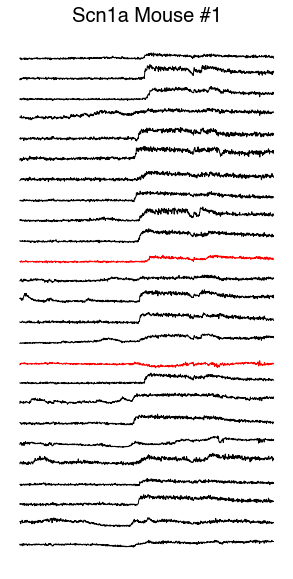

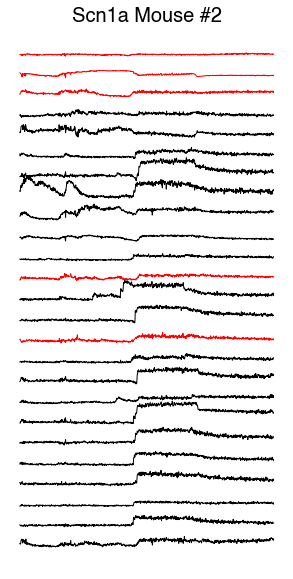

In [317]:
### Visualizing dF/F Traces

# Plot Scn1a 3007 seizure
stagger = 0
plt.rcParams['figure.figsize'] = 5,10
for row in np.arange(50,75):
    color='black'
    if row in scn1a_3007_redids:
        color='red'
    plt.plot((scn1a_3007_dFF[row,15000:15900]+stagger), linewidth=1.0, color=color)
    stagger = stagger + 3

plt.axis('off')
#plt.xticks([]," ") # Remove ticks and labels
#plt.yticks([]," ") # Remobe ticks and labels
plt.title('Scn1a Mouse #1',**hfont,fontsize=20)
plt.savefig('dFF_seizure_scn1a_3007')

plt.figure()

# Plot Scn1a 3011 seizure
stagger = 0
plt.rcParams['figure.figsize'] = 5,10
for row in np.arange(25,50):
    color='black'
    if row in scn1a_3011_redids:
        color='red'
    plt.plot((scn1a_3011_dFF[row,12400:13300]+stagger), linewidth=1.0, color=color)
    stagger = stagger + 3

plt.axis('off')
#plt.xticks([]," ") # Remove ticks and labels
#plt.yticks([]," ") # Remobe ticks and labels
plt.title('Scn1a Mouse #2',**hfont,fontsize=20)
plt.savefig('dFF_seizure_scn1a_3011')

In [312]:
### Visualize Spikes for Entire Recording as Raster Plot

plt.rcParams['figure.figsize'] = 15,10 # Set figure size/shape
thrspk = 50 # Set spike threshold

## Scn1a 3007

# Modify spike data for raster plot
spk_data = scn1a_3007_spks # Get suite2p spike output
indices = np.arange(0,spk_data.shape[1]) # Create array of the time indices (x axis)
spk_data = np.where(spk_data > thrspk, indices, 0) # Threshold spikes by thrspk
scn1a_3007_bi = spk_data[scn1a_3007_cellids[0]] # Select only ROIs that are cells
# Set colors
colors_ind = np.indices((1,scn1a_3007_bi.shape[0]))[1][0] # Create array of cell indices (y axis)
colors = np.where(np.isin(colors_ind,scn1a_3007_redids),'red','black') # Set red cells as red and all others as black

plt.eventplot(scn1a_3007_bi, colors=colors) # Plot as raster plot
# Set axes ticks and labels
xticks = np.arange(0,scn1a_3007_Fcells.shape[1],1800) # Set x-ticks
xticklabels = np.arange(0,scn1a_3007_Fcells.shape[1]/1800,1, dtype='int32') # Set x-tick labels
plt.title('Scn1a Mouse #1',**hfont,fontsize=16)
plt.xticks(ticks=xticks,labels=xticklabels)
plt.xlabel('Time (min)',**hfont,fontsize=16)
plt.ylabel('Cell',**hfont,fontsize=16)

plt.savefig('scn1a_3007_spks')
plt.clf()

## Scn1a 3011

# Modify spike data for raster plot
spk_data = scn1a_3011_spks
indices = np.arange(0,spk_data.shape[1])
spk_data = np.where(spk_data > thrspk, indices, 0)
scn1a_3011_bi = spk_data[scn1a_3011_cellids[0]]
# Set colors
colors_ind = np.indices((1,scn1a_3011_bi.shape[0]))[1][0]
colors = np.where(np.isin(colors_ind,scn1a_3011_redids),'red','black')

plt.eventplot(scn1a_3011_bi, colors=colors)
# Set axes ticks and labels
xticks = np.arange(0,scn1a_3011_Fcells.shape[1],1800) # Set x-ticks
xticklabels = np.arange(0,scn1a_3011_Fcells.shape[1]/1800,1, dtype='int32') # Set x-tick labels
plt.title('Scn1a Mouse #2',**hfont,fontsize=16)
plt.xticks(ticks=xticks,labels=xticklabels)
plt.xlabel('Time (min)',**hfont,fontsize=16)
plt.ylabel('Cell',**hfont,fontsize=16)

plt.savefig('scn1a_3011_spks')
plt.clf()

## WT 3009

# Modify spike data for raster plot
spk_data = WT_3009_spks
indices = np.arange(0,spk_data.shape[1])
spk_data = np.where(spk_data > thrspk, indices, 0)
WT_3009_bi = spk_data[WT_3009_cellids[0]]
# Set colors
colors_ind = np.indices(1,WT_3009_bi.shape[0])[1][0]
colors = np.where(np.isin(colors_ind,WT_3009_redids),'red','black')

plt.eventplot(WT_3009_bi, colors=colors)
# Set axes ticks and labels
xticks = np.arange(0,WT_3009_Fcells.shape[1],1800) # Set x-ticks
xticklabels = np.arange(0,WT_3009_Fcells.shape[1]/1800,1, dtype='int32') # Set x-tick labels
plt.title('WT Mouse #1',**hfont,fontsize=16)
plt.xticks(ticks=xticks,labels=xticklabels)
plt.xlabel('Time (min)',**hfont,fontsize=16)
plt.ylabel('Cell',**hfont,fontsize=16)

plt.savefig('WT_3009_spks')
plt.clf()

## WT 3068

# Modify spike data for raster plot
spk_data = WT_3068_spks
indices = np.arange(0,spk_data.shape[1])
spk_data = np.where(spk_data > thrspk, indices, 0)
WT_3068_bi = spk_data[WT_3068_cellids[0]]
# Set colors
colors_ind = np.indices((1,WT_3068_bi.shape[0]))[1][0]
colors = np.where(np.isin(colors_ind,WT_3068_redids),'red','black')

plt.eventplot(WT_3068_bi, colors=colors)
# Set axes ticks and labels
xticks = np.arange(0,WT_3068_Fcells.shape[1],1800) # Set x-ticks
xticklabels = np.arange(0,WT_3068_Fcells.shape[1]/1800,1, dtype='int32') # Set x-tick labels
plt.title('WT Mouse #2',**hfont,fontsize=16)
plt.xticks(ticks=xticks,labels=xticklabels)
plt.xlabel('Time (min)',**hfont,fontsize=16)
plt.ylabel('Cell',**hfont,fontsize=16)

plt.savefig('WT_3068_spks')
plt.clf()

<Figure size 1080x720 with 0 Axes>

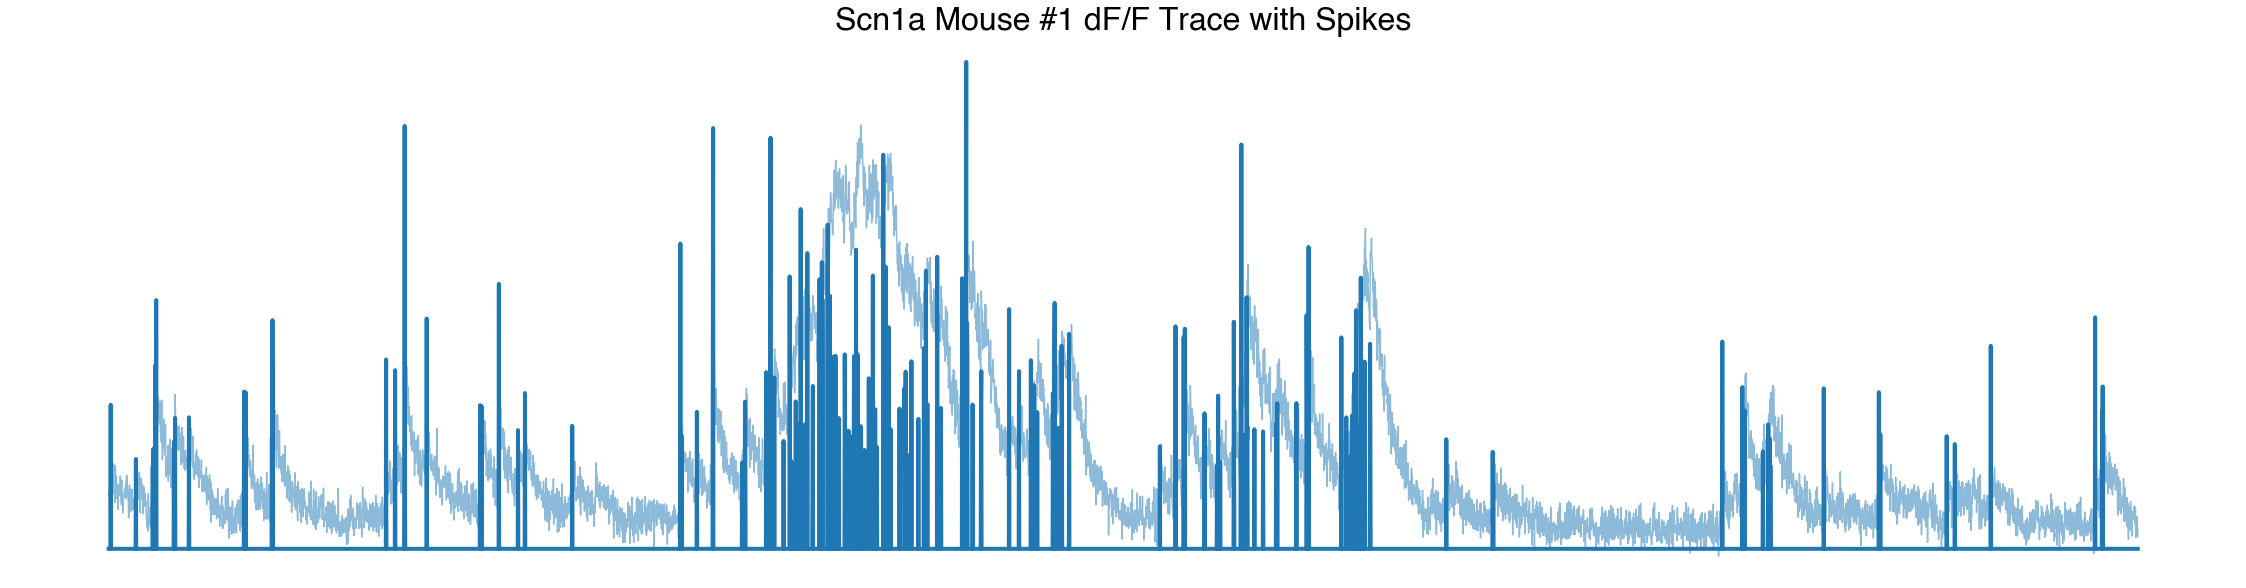

In [376]:
### Plot dF/F, spikes

plt.rcParams['figure.figsize'] = 40,10 # Set figure size/shape

cell_num = 15 # Cell index to be plotted
time0 = 1000 # Start time of trace
time1 = 8000 # End time of trace

# Select spikes with a threshold of thrspk
thrspk = 50
scn1a_3007_thrspk = np.where(scn1a_3007_spks[scn1a_3007_cellids[0]] > thrspk, scn1a_3007_spks[scn1a_3007_cellids[0]], 0)

plt.plot(scn1a_3007_dFF[cell_num,time0:time1],color='tab:blue',alpha=0.5) # Plot dF/F trace
plt.plot(scn1a_3007_thrspk[cell_num,time0:time1]*.01,color='tab:blue',lw=4) # Plot thresholded spikes
plt.axis('off')
plt.title('Scn1a Mouse #1 dF/F Trace with Spikes',**hfont,fontsize=32)
plt.savefig('example_dFF_spikes')

<Figure size 1080x720 with 0 Axes>

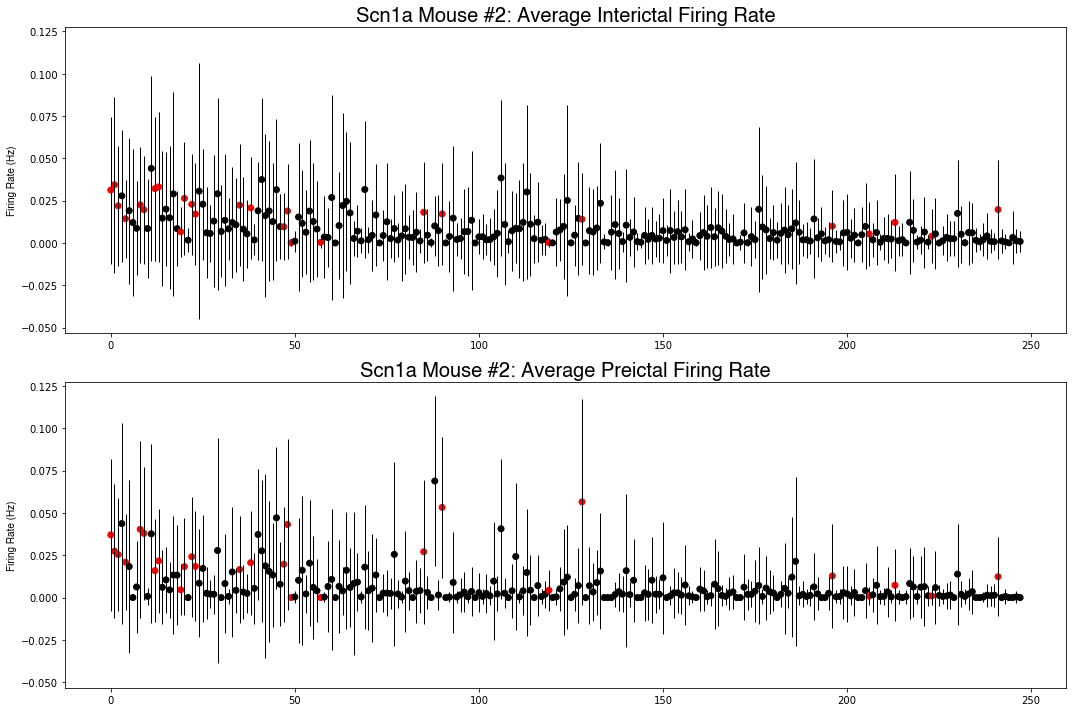

In [472]:
### Calculate average firing rates during each period

# Set parameters
n = 500 # number of random samples
s = 1 # legnth of each sample in seconds
sz = s*30 # length of each sample in sec/30 (sampling rate of data is 30 Hz)

scn1a_3007_s = np.where(scn1a_3007_bi > 0, 1, 0)

allspikes = scn1a_3007_s # set dataset name for all spikes
end_interictal = 7200
start_preictal = 13500
end_preictal = 15300

inter_frs = np.empty((allspikes.shape[0],n))
pre_frs = np.empty((allspikes.shape[0],n))
for i in np.arange(0,allspikes.shape[0]):
    for j in np.arange(0,n):
        start = np.random.choice(np.arange(0,end_interictal-sz))
        inter_frs[i,j] = np.mean(allspikes[i,start:(start+sz)])
        start = np.random.choice(np.arange(start_preictal,end_preictal-sz))
        pre_frs[i,j] = np.mean(allspikes[i,start:(start+sz)])

mean_inter_frs = np.mean(inter_frs,axis=1)
mean_pre_frs = np.mean(pre_frs,axis=1)

scn1a_3007_mean_inter_frs = mean_inter_frs
scn1a_3007_mean_pre_frs = mean_pre_frs

colors_ind = np.indices((1,scn1a_3007_bi.shape[0]))[1][0]
colors = np.where(np.isin(colors_ind,scn1a_3007_redids),'red','black')

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(15, 10), sharey=True)
ax1.set_title('Scn1a Mouse #1: Average Interictal Firing Rate',**hfont,fontsize=20)
ax1.set_ylabel('Firing Rate (Hz)',**hfont)
ax1.scatter(np.arange(0,len(mean_inter_frs)),mean_inter_frs,c=colors)
ax1.errorbar(np.arange(0,len(mean_inter_frs)),mean_inter_frs,yerr=np.std(inter_frs,axis=1),fmt='none',ecolor='black',elinewidth=1)
ax2.set_title('Scn1a Mouse #1: Average Preictal Firing Rate',**hfont,fontsize=20)
ax2.set_ylabel('Firing Rate (Hz)',**hfont)
ax2.scatter(np.arange(0,len(mean_pre_frs)),mean_pre_frs,c=colors)
ax2.errorbar(np.arange(0,len(mean_pre_frs)),mean_pre_frs,yerr=np.std(pre_frs,axis=1),fmt='none',ecolor='black',elinewidth=1)

plt.tight_layout()
plt.savefig('avg_firing_rate_by_cell_scn1a_3007')

plt.clf()

scn1a_3011_s = np.where(scn1a_3011_bi > 0, 1, 0)

allspikes = scn1a_3011_s # set dataset name for all spikes
end_interictal = 7200
start_preictal = 10800
end_preictal = 12600

inter_frs = np.empty((allspikes.shape[0],n))
pre_frs = np.empty((allspikes.shape[0],n))
for i in np.arange(0,allspikes.shape[0]):
    for j in np.arange(0,n):
        start = np.random.choice(np.arange(0,end_interictal-sz))
        inter_frs[i,j] = np.mean(allspikes[i,start:(start+sz)])
        start = np.random.choice(np.arange(start_preictal,end_preictal-sz))
        pre_frs[i,j] = np.mean(allspikes[i,start:(start+sz)])

mean_inter_frs = np.mean(inter_frs,axis=1)
mean_pre_frs = np.mean(pre_frs,axis=1)

scn1a_3011_mean_inter_frs = mean_inter_frs
scn1a_3011_mean_pre_frs = mean_pre_frs

colors_ind = np.indices((1,scn1a_3011_bi.shape[0]))[1][0]
colors = np.where(np.isin(colors_ind,scn1a_3011_redids),'red','black')

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(15, 10), sharey=True)
ax1.set_title('Scn1a Mouse #2: Average Interictal Firing Rate',**hfont,fontsize=20)
ax1.set_ylabel('Firing Rate (Hz)',**hfont)
ax1.scatter(np.arange(0,len(mean_inter_frs)),mean_inter_frs,c=colors)
ax1.errorbar(np.arange(0,len(mean_inter_frs)),mean_inter_frs,yerr=np.std(inter_frs,axis=1),fmt='none',ecolor='black',elinewidth=1)
ax2.set_title('Scn1a Mouse #2: Average Preictal Firing Rate',**hfont,fontsize=20)
ax2.set_ylabel('Firing Rate (Hz)',**hfont)
ax2.scatter(np.arange(0,len(mean_pre_frs)),mean_pre_frs,c=colors)
ax2.errorbar(np.arange(0,len(mean_pre_frs)),mean_pre_frs,yerr=np.std(pre_frs,axis=1),fmt='none',ecolor='black',elinewidth=1)

plt.tight_layout()
plt.savefig('avg_firing_rate_by_cell_scn1a_3011')



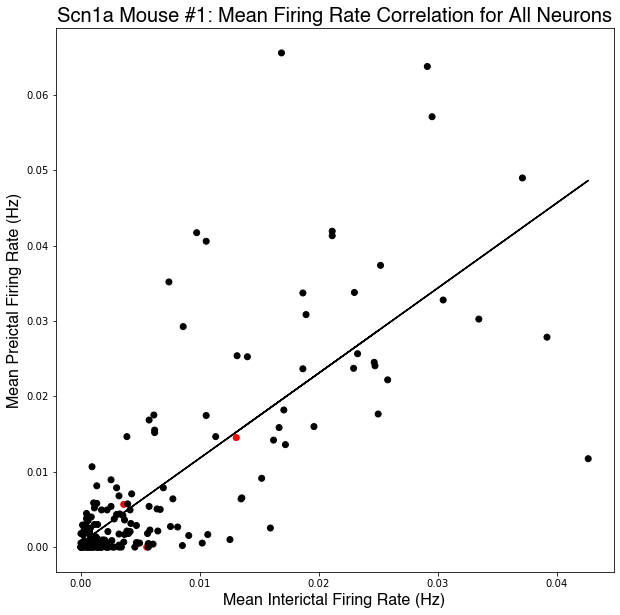

1.1280954350633015 0.0005278387485607637


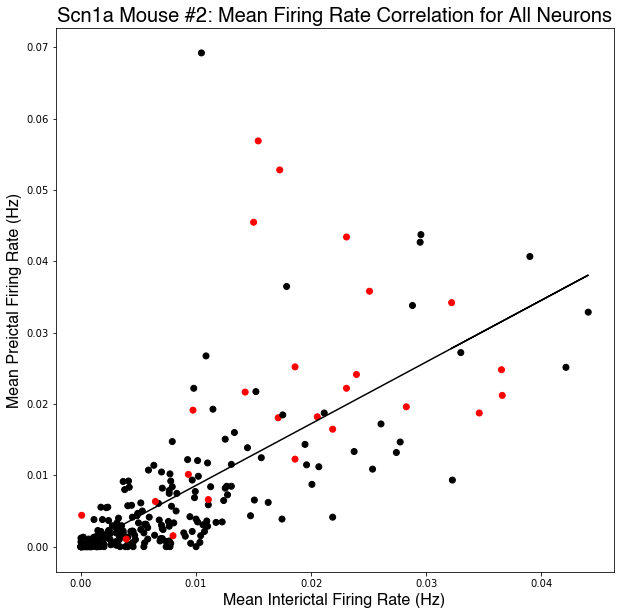

0.8649268530565646 -5.955700480847738e-05


In [447]:
### Plot correlations with matplotlib

plt.rcParams['figure.figsize'] = 10,10

colors_ind = np.indices((1,scn1a_3007_bi.shape[0]))[1][0]
colors = np.where(np.isin(colors_ind,scn1a_3007_redids),'red','black')
plt.scatter(scn1a_3007_mean_inter_frs,scn1a_3007_mean_pre_frs,c=colors)
m, b = np.polyfit(scn1a_3007_mean_inter_frs,scn1a_3007_mean_pre_frs, 1)
plt.plot(scn1a_3007_mean_inter_frs, m*scn1a_3007_mean_inter_frs+b,c='black')
plt.title('Scn1a Mouse #1: Mean Firing Rate Correlation for All Neurons',**hfont,fontsize=20)
plt.xlabel('Mean Interictal Firing Rate (Hz)',**hfont,fontsize=16)
plt.ylabel('Mean Preictal Firing Rate (Hz)',**hfont,fontsize=16)
plt.savefig('scn1a_3007_all_correlation')
plt.show()

print(m,b)

colors_ind = np.indices((1,scn1a_3011_bi.shape[0]))[1][0]
colors = np.where(np.isin(colors_ind,scn1a_3011_redids),'red','black')
plt.scatter(scn1a_3011_mean_inter_frs,scn1a_3011_mean_pre_frs,c=colors)
m, b = np.polyfit(scn1a_3011_mean_inter_frs,scn1a_3011_mean_pre_frs, 1)
plt.plot(scn1a_3011_mean_inter_frs, m*scn1a_3011_mean_inter_frs+b,c='black')
plt.title('Scn1a Mouse #2: Mean Firing Rate Correlation for All Neurons',**hfont,fontsize=20)
plt.xlabel('Mean Interictal Firing Rate (Hz)',**hfont,fontsize=16)
plt.ylabel('Mean Preictal Firing Rate (Hz)',**hfont,fontsize=16)
plt.savefig('scn1a_3011_all_correlation')
plt.show()

print(m,b)

/Users/sophieliebergall/opt/anaconda3/envs/suite2p/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/sophieliebergall/opt/anaconda3/envs/suite2p/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/sophieliebergall/opt/anaconda3/envs/suite2p/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments witho

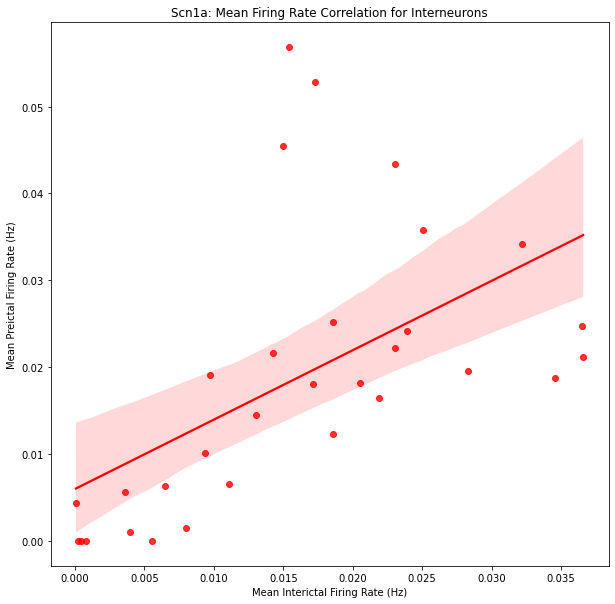

In [471]:
### Plot correlations with Seaborn

## All cells

import seaborn as sns

fig = sns.regplot(scn1a_3007_mean_inter_frs, scn1a_3007_mean_pre_frs, ci=95, color='black')
fig.set(title='Scn1a Mouse #1: Mean Firing Rate Correlation for All Neurons',xlabel='Mean Interictal Firing Rate (Hz)',ylabel='Mean Preictal Firing Rate (Hz)')
fig.figure.savefig('scn1a_3007_all_correlation_sns')

plt.clf()

fig = sns.regplot(scn1a_3011_mean_inter_frs, scn1a_3011_mean_pre_frs, ci=95, color='black')
fig.set(title='Scn1a Mouse #2: Mean Firing Rate Correlation for All Neurons',xlabel='Mean Interictal Firing Rate (Hz)',ylabel='Mean Preictal Firing Rate (Hz)')
fig.figure.savefig('scn1a_3011_all_correlation_sns')

plt.clf()
fig = sns.regplot(np.concatenate((scn1a_3007_mean_inter_frs,scn1a_3011_mean_inter_frs),axis=0), np.concatenate((scn1a_3007_mean_pre_frs,scn1a_3011_mean_pre_frs),axis=0), ci=95, color='black')
fig.set(title='Scn1a: Mean Firing Rate Correlation for All Neurons',xlabel='Mean Interictal Firing Rate (Hz)',ylabel='Mean Preictal Firing Rate (Hz)')
fig.figure.savefig('scn1a_ALL_correlation_sns')

plt.clf()

## PV Interneurons

fig = sns.regplot(np.concatenate((scn1a_3007_mean_inter_frs[scn1a_3007_redids],scn1a_3011_mean_inter_frs[scn1a_3011_redids]),axis=0), np.concatenate((scn1a_3007_mean_pre_frs[scn1a_3007_redids],scn1a_3011_mean_pre_frs[scn1a_3011_redids]),axis=0), ci=95, color='red')
fig.set(title='Scn1a: Mean Firing Rate Correlation for Interneurons',xlabel='Mean Interictal Firing Rate (Hz)',ylabel='Mean Preictal Firing Rate (Hz)')
fig.figure.savefig('scn1a_3007_INs_correlation_sns')

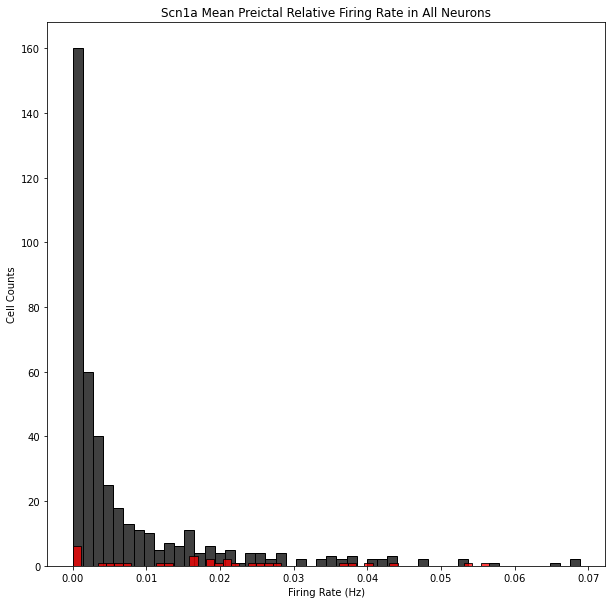

In [490]:
### Plot Histograms of Mean Firing Rates

## Interictal - All Neurons from Both Mice (INs in red)
inter_all_hist = sns.histplot(np.concatenate((scn1a_3007_mean_inter_frs,scn1a_3011_mean_inter_frs),axis=0), bins=50,color='black')
inter_all_hist.set(xlabel='Firing Rate (Hz)',ylabel='Cell Counts',title='Scn1a Mean Interictal Relative Firing Rate in All Neurons')
inter_all_hist = sns.histplot(np.concatenate((scn1a_3007_mean_inter_frs[scn1a_3007_redids],scn1a_3011_mean_inter_frs[scn1a_3011_redids])), bins=50,color='red')
inter_all_hist.figure.savefig('scn1a_all_inter_frs_hist')

plt.clf()

## Preictal - All Neurons from Both Mice (INs in red)
pre_all_hist = sns.histplot(np.concatenate((scn1a_3007_mean_pre_frs,scn1a_3011_mean_pre_frs),axis=0), bins=50,color='black')
pre_all_hist.set(xlabel='Firing Rate (Hz)',ylabel='Cell Counts',title='Scn1a Mean Preictal Relative Firing Rate in All Neurons')
pre_all_hist = sns.histplot(np.concatenate((scn1a_3007_mean_pre_frs[scn1a_3007_redids],scn1a_3011_mean_pre_frs[scn1a_3011_redids])), bins=50,color='red')
pre_all_hist.figure.savefig('scn1a_all_pre_frs_hist')